In [287]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import seaborn as sns

import warnings

warnings.filterwarnings(
    module='scipy',
    action='ignore',
    message='Using a')

In [288]:
#get the data
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1 #the data has 2 and 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])] #remove target variable and other columns

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [83]:
X_train.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [289]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


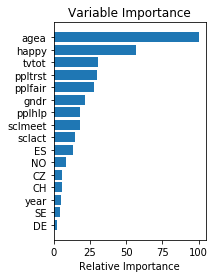

In [290]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

    Creating new features
    Applying more overfitting-prevention strategies like subsampling
    More iterations
    Trying a different loss function
    Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [50]:
#run a loop test a number of different parameters on the same data
n_ests = []
max_d = []
subsample = []
min_sam_leaf = []
TRT1 = []
TRT2 = []
TST1 = []
TST2 = []
for i in range(1,11,1):
    for j in range(1,11,1):
        for k in range(1,11):
            for l in range(1,6):
                params = {'n_estimators': i*100,
                      'max_depth': j,
                      'subsample':1/k,
                      'loss': 'deviance',
                      'min_samples_leaf':l}
                # Initialize and fit the model.
                clf = ensemble.GradientBoostingClassifier(**params)
                clf.fit(X_train, y_train)
                predict_train = clf.predict(X_train)
                predict_test = clf.predict(X_test)
                # Accuracy tables.
                table_train = pd.crosstab(y_train, predict_train, margins=True)
                table_test = pd.crosstab(y_test, predict_test, margins=True)
                train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
                train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
                test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
                test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
                #append info
                n_ests.append(i*100)
                max_d.append(j)
                subsample.append(1/k)
                min_sam_leaf.append(l)
                TRT1.append(train_tI_errors)
                TRT2.append(train_tII_errors)
                TST1.append(test_tI_errors)
                TST2.append(test_tII_errors)

In [51]:
#Create a df for plotting
results = pd.DataFrame()
results['n_estimates'] = n_ests
results['max_d'] = max_d
results['subsample'] = subsample
results['mins_samples_leaf'] = min_sam_leaf
results['train_type_1'] = TRT1 
results['train_type_2'] = TRT2 
results['test_type_1'] = TST1 
results['test_type_2'] =TST2 


In [277]:
#identify which parameters performed better than the example
better_than_previous = results_exponential.loc[(results_exponential.test_type_1<.0625)&\
                                (results_exponential.test_type_2 < .1852)]
better_than_previous.head()

,n_estimates,max_d,subsample,mins_samples_leaf,train_type_1,train_type_2,test_type_1,test_type_2,test_avg_error
150,100,4,1.000000,1,0.040917,0.172259,0.061350,0.184049,0.122699
151,100,4,1.000000,2,0.039553,0.171713,0.057669,0.182822,0.120245
575,200,2,0.166667,1,0.048418,0.185625,0.060123,0.184049,0.122086
1062,300,2,0.333333,3,0.048827,0.177578,0.057669,0.184049,0.120859
1126,300,3,0.166667,2,0.046645,0.168576,0.061350,0.182822,0.122086


In [52]:
results_deviance #saved to compare from the first series of loops (smaller ranges for each parameter)
results_exponential = results #2nd series of loops

In [346]:
results_deviance.loc[(results_deviance.test_type_1<.0625)&\
                                (results_deviance.test_type_2 < .1852)]

,n_estimates,max_d,subsample,mins_samples_leaf,train_type_1,train_type_2,test_type_1,test_type_2
110,100,4,1.0,3,0.038052,0.168712,0.06135,0.182822


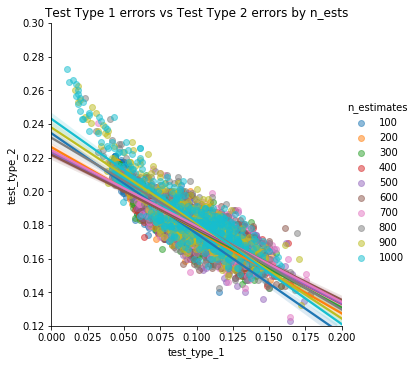

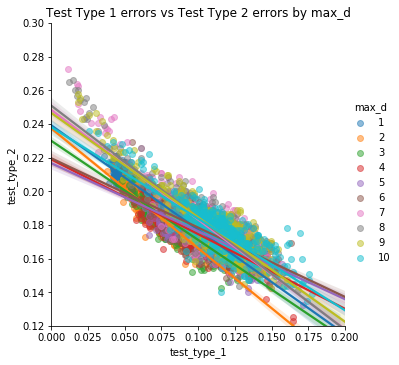

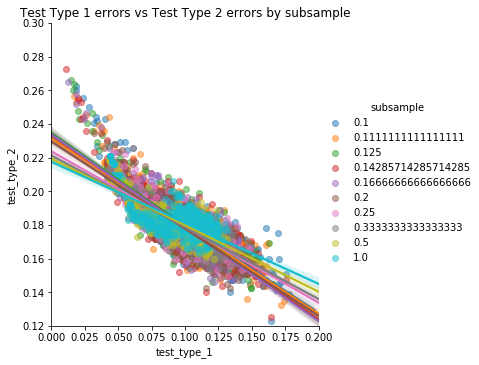

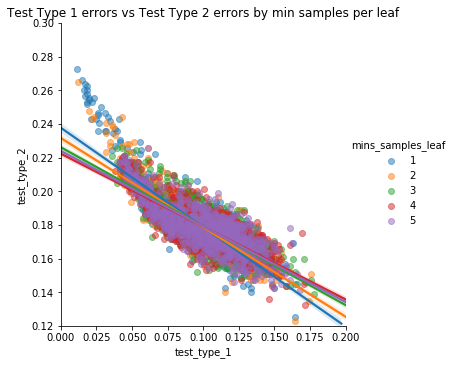

In [274]:
#Plot the exponential loop tests(hue by parameter)
sns.lmplot(x='test_type_1',y='test_type_2',hue='n_estimates',\
           data=results_exponential, scatter_kws={'alpha':.5} )
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by n_ests')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='max_d',\
           data=results_exponential, scatter_kws={'alpha':.5})
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by max_d')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='subsample',\
           data=results_exponential, scatter_kws={'alpha':.5})
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by subsample')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='mins_samples_leaf',\
           data=results_exponential, scatter_kws={'alpha':.5})
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by min samples per leaf')
plt.show()

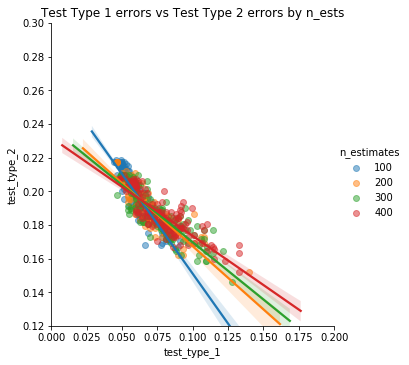

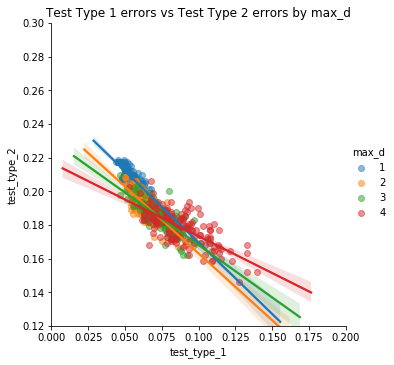

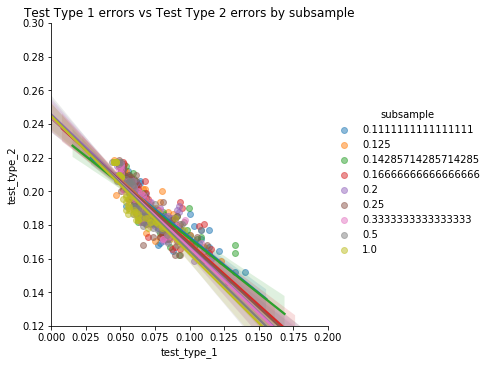

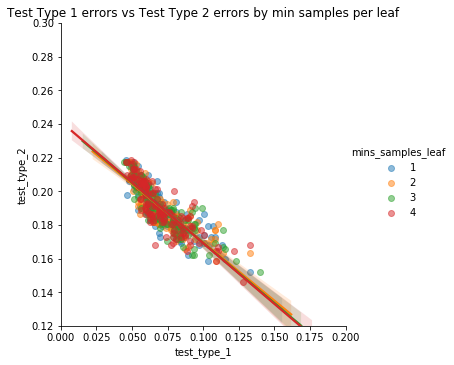

In [275]:
# plot the deviance loss results(hue by parameter)
sns.lmplot(x='test_type_1',y='test_type_2',hue='n_estimates',\
           data=results_deviance, scatter_kws={'alpha':.5} \
           )
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by n_ests')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='max_d',\
           data=results_deviance, scatter_kws={'alpha':.5} \
           )
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by max_d')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='subsample',\
           data=results_deviance, scatter_kws={'alpha':.5} \
           )
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by subsample')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='mins_samples_leaf',\
           data=results_deviance, scatter_kws={'alpha':.5} \
           )
plt.xlim(0,.2)
plt.ylim(.12,.30)
plt.title('Test Type 1 errors vs Test Type 2 errors by min samples per leaf')
plt.show()

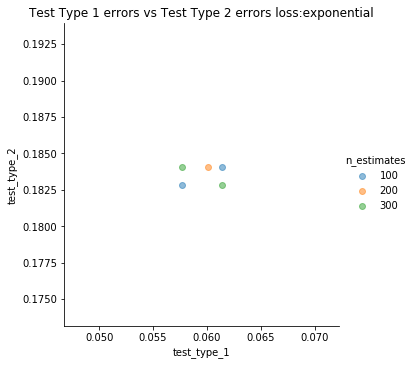

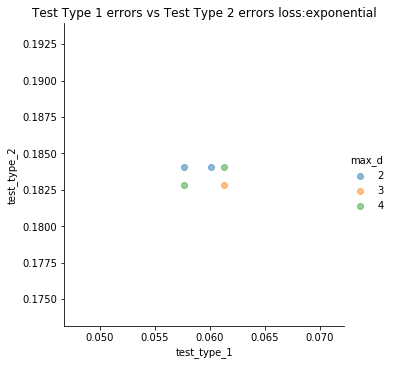

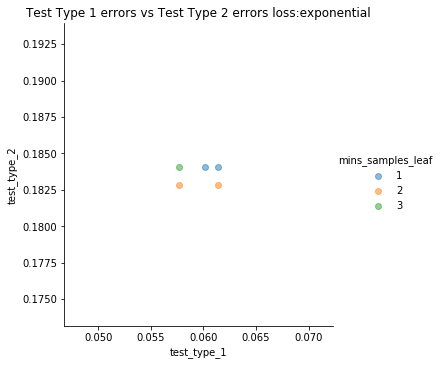

In [278]:
# plot the parameter instances that performed better than the example(hue by parameter)
sns.lmplot(x='test_type_1',y='test_type_2',hue='n_estimates',data=better_than_previous,\
              fit_reg=False, scatter_kws={'alpha':.5})

plt.title('Test Type 1 errors vs Test Type 2 errors loss:exponential')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='max_d',data=better_than_previous,\
              fit_reg=False, scatter_kws={'alpha':.5})

plt.title('Test Type 1 errors vs Test Type 2 errors loss:exponential')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='mins_samples_leaf',data=better_than_previous,\
              fit_reg=False, scatter_kws={'alpha':.5})

plt.title('Test Type 1 errors vs Test Type 2 errors loss:exponential')
plt.show()

In [280]:
betterT = better_than_previous.T

In [291]:
#run loops with the previous parameters see which one does better
n_ests = []
max_d = []
subsample = []
min_sam_leaf = []
TRT1 = []
TRT2 = []
TST1 = []
TST2 = []
for col in betterT:    
    for i in range(1,11,1):
        params = {'n_estimators': int(betterT[col][0]),
              'max_depth': int(betterT[col][1]),
              'subsample': betterT[col][2],
              'loss': 'deviance',
              'min_samples_leaf':int(betterT[col][3])}
        # Initialize and fit the model.
        clf = ensemble.GradientBoostingClassifier(**params)
        clf.fit(X_train, y_train)
        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)
        # Accuracy tables.
        table_train = pd.crosstab(y_train, predict_train, margins=True)
        table_test = pd.crosstab(y_test, predict_test, margins=True)
        train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
        train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
        #append info
        n_ests.append(int(betterT[col][0]))
        max_d.append(int(betterT[col][1]))
        subsample.append(betterT[col][2])
        min_sam_leaf.append(int(betterT[col][3]))
        TRT1.append(train_tI_errors)
        TRT2.append(train_tII_errors)
        TST1.append(test_tI_errors)
        TST2.append(test_tII_errors)

In [292]:
#create dataframe to plot results
top5_avg = pd.DataFrame()
top5_avg['n_estimates'] = n_ests
top5_avg['max_d'] = max_d
top5_avg['subsample'] = subsample
top5_avg['mins_samples_leaf'] = min_sam_leaf
top5_avg['train_type_1'] = TRT1 
top5_avg['train_type_2'] = TRT2 
top5_avg['test_type_1'] = TST1 
top5_avg['test_type_2'] =TST2 
top5_avg['avg_test_error'] = (top5_avg.test_type_1+top5_avg.test_type_2)/2

In [293]:
top5_avg.sort_values(by='avg_test_error').head()

,n_estimates,max_d,subsample,mins_samples_leaf,train_type_1,train_type_2,test_type_1,test_type_2,avg_test_error
44,300,3,0.166667,2,0.046236,0.157801,0.061350,0.180368,0.120859
33,300,2,0.333333,3,0.048554,0.177987,0.060123,0.184049,0.122086
0,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
1,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
2,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
3,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
4,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
5,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
6,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699
7,100,4,1.000000,1,0.037780,0.168303,0.062577,0.182822,0.122699


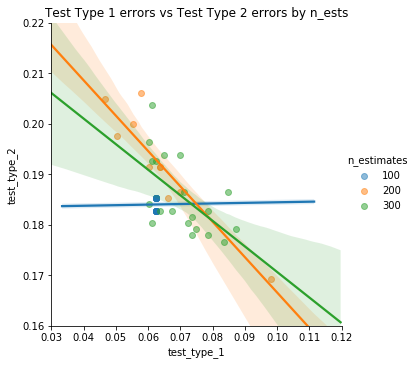

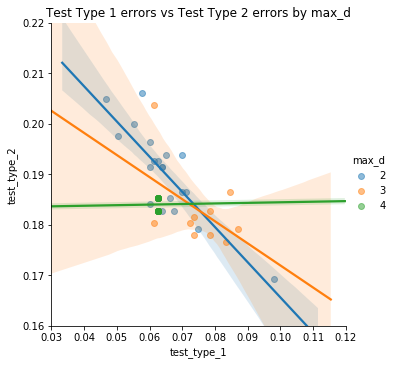

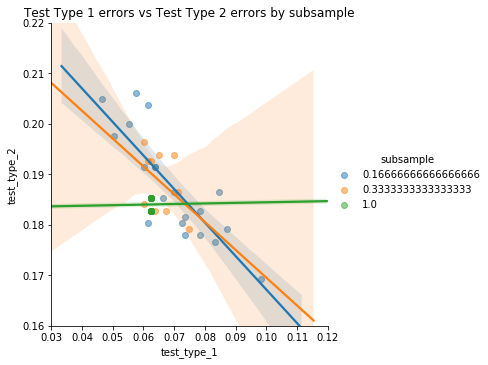

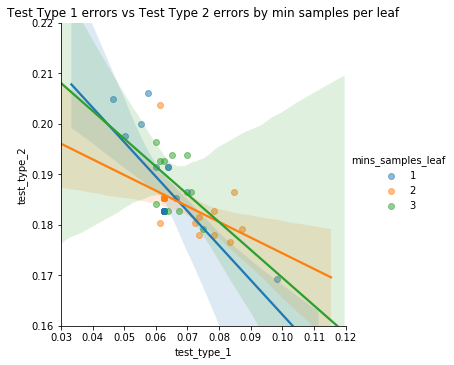

In [297]:
sns.lmplot(x='test_type_1',y='test_type_2',hue='n_estimates',\
           data=top5_avg, scatter_kws={'alpha':.5} \
           )
plt.xlim(0.03,.12)
plt.ylim(.16,.22)
plt.title('Test Type 1 errors vs Test Type 2 errors by n_ests')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='max_d',\
           data=top5_avg, scatter_kws={'alpha':.5} \
           )
plt.xlim(0.03,.12)
plt.ylim(.16,.22)
plt.title('Test Type 1 errors vs Test Type 2 errors by max_d')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='subsample',\
           data=top5_avg, scatter_kws={'alpha':.5} \
           )
plt.xlim(0.03,.12)
plt.ylim(.16,.22)
plt.title('Test Type 1 errors vs Test Type 2 errors by subsample')
plt.show()
sns.lmplot(x='test_type_1',y='test_type_2',hue='mins_samples_leaf',\
           data=top5_avg, scatter_kws={'alpha':.5} \
           )
plt.xlim(0.03,.12)
plt.ylim(.16,.22)
plt.title('Test Type 1 errors vs Test Type 2 errors by min samples per leaf')
plt.show()

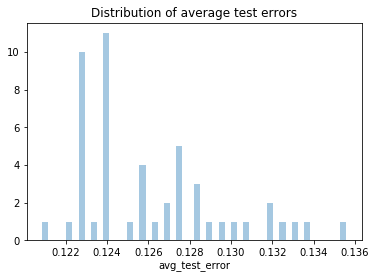

In [295]:
g = sns.distplot(top5_avg.avg_test_error,bins=50,kde=False)
plt.title('Distribution of average test errors')
plt.show()

In [339]:
#Start over and add features
y = df['partner'] - 1 #the data has 2 and 1
df.cntry = df.cntry.astype('category')
df.cntry = df.cntry.cat.codes
X = df.loc[:, ~df.columns.isin(['partner','idno'])]
#remove target variable and other columns

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['tvtot'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [340]:
#Run original loop to get best performing parameters with new features
#ranges optimized according revious best performers to cut down run time
n_ests = []
max_d = []
subsample = []
min_sam_leaf = []
TRT1 = []
TRT2 = []
TST1 = []
TST2 = []
for i in range(2,6,1):
    for j in range(1,6,1):
        for k in range(1,11):
            for l in range(1,4,1):
                params = {'n_estimators': i*100,
                      'max_depth': j,
                      'subsample':1/k,
                      'loss': 'deviance',
                      'min_samples_leaf':l}
                # Initialize and fit the model.
                clf = ensemble.GradientBoostingClassifier(**params)
                clf.fit(X_train, y_train)
                predict_train = clf.predict(X_train)
                predict_test = clf.predict(X_test)
                # Accuracy tables.
                table_train = pd.crosstab(y_train, predict_train, margins=True)
                table_test = pd.crosstab(y_test, predict_test, margins=True)
                train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
                train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
                test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
                test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
                #append info
                n_ests.append(i*100)
                max_d.append(j)
                subsample.append(1/k)
                min_sam_leaf.append(l)
                TRT1.append(train_tI_errors)
                TRT2.append(train_tII_errors)
                TST1.append(test_tI_errors)
                TST2.append(test_tII_errors)

In [343]:
results1 = pd.DataFrame()
results1['n_estimates'] = n_ests
results1['max_d'] = max_d
results1['subsample'] = subsample
results1['mins_samples_leaf'] = min_sam_leaf
results1['train_type_1'] = TRT1 
results1['train_type_2'] = TRT2 
results1['test_type_1'] = TST1 
results1['test_type_2'] =TST2 
results1['avg_test_error'] = (results1.test_type_1+results1.test_type_2)/2
results1.sort_values(by='avg_test_error').head()

,n_estimates,max_d,subsample,mins_samples_leaf,train_type_1,train_type_2,test_type_1,test_type_2,avg_test_error
180,300,2,1.000000,1,0.046781,0.181124,0.051534,0.182822,0.117178
182,300,2,1.000000,3,0.045690,0.182079,0.051534,0.186503,0.119018
181,300,2,1.000000,2,0.045827,0.181806,0.051534,0.188957,0.120245
76,200,3,0.166667,2,0.054146,0.166258,0.082209,0.159509,0.120859
332,400,2,1.000000,3,0.046372,0.178942,0.057669,0.184049,0.120859


In [351]:
better2 = results1.loc[(results1.test_type_1<.0625)&\
                                (results1.test_type_2 < .1852)]
better2T = better2.T

In [356]:
#See if exponential can do better using the top 5 parameter settings from above
n_ests = []
max_d = []
subsample = []
min_sam_leaf = []
TRT1 = []
TRT2 = []
TST1 = []
TST2 = []
for col in better2T:    
    for i in range(1,11,1):
        params = {'n_estimators': int(better2T[col][0]),
              'max_depth': int(better2T[col][1]),
              'subsample': better2T[col][2],
              'loss': 'exponential',
              'min_samples_leaf':int(better2T[col][3])}
        # Initialize and fit the model.
        clf = ensemble.GradientBoostingClassifier(**params)
        clf.fit(X_train, y_train)
        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)
        # Accuracy tables.
        table_train = pd.crosstab(y_train, predict_train, margins=True)
        table_test = pd.crosstab(y_test, predict_test, margins=True)
        train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
        train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
        test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
        test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
        #append info
        n_ests.append(int(better2T[col][0]))
        max_d.append(int(better2T[col][1]))
        subsample.append(better2T[col][2])
        min_sam_leaf.append(int(better2T[col][3]))
        TRT1.append(train_tI_errors)
        TRT2.append(train_tII_errors)
        TST1.append(test_tI_errors)
        TST2.append(test_tII_errors)
#make a dataframe, plotting is easier in seaborn        
top52_avg1 = pd.DataFrame()
top52_avg1['n_estimates'] = n_ests
top52_avg1['max_d'] = max_d
top52_avg1['subsample'] = subsample
top52_avg1['mins_samples_leaf'] = min_sam_leaf
top52_avg1['train_type_1'] = TRT1 
top52_avg1['train_type_2'] = TRT2 
top52_avg1['test_type_1'] = TST1 
top52_avg1['test_type_2'] =TST2 
top52_avg1['avg_test_error'] = (top5_avg.test_type_1+top5_avg.test_type_2)/2

In [358]:
top52_avg1.sort_values(by='avg_test_error').head()

,n_estimates,max_d,subsample,mins_samples_leaf,train_type_1,train_type_2,test_type_1,test_type_2,avg_test_error
44,500,2,1.000000,1,0.048827,0.178123,0.056442,0.186503,0.120859
33,400,2,1.000000,3,0.048009,0.180715,0.057669,0.187730,0.122086
0,200,2,0.333333,3,0.046645,0.185625,0.061350,0.188957,0.122699
1,200,2,0.333333,3,0.044463,0.186170,0.055215,0.196319,0.122699
2,200,2,0.333333,3,0.045827,0.185625,0.057669,0.192638,0.122699


With the example average error at .1226, i was able to reduce it to .1171 by turning the countries into numerical categories (inplace) and by adding tvtot as dummies.